# MULTIPLE LINEAR REGRESSION

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_6/ToyotaCorolla%20-%20MLR.csv')

# EDA

In [5]:
# Display the first few rows of the dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
# Rename columns for better readability
df = df.rename({'Age_08_04': 'Age', 'cc': 'CC'}, axis=1)

In [8]:
# Check the dimensions of the dataset
df.shape

(1436, 11)

In [9]:
# Check for missing values
df.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Visualization

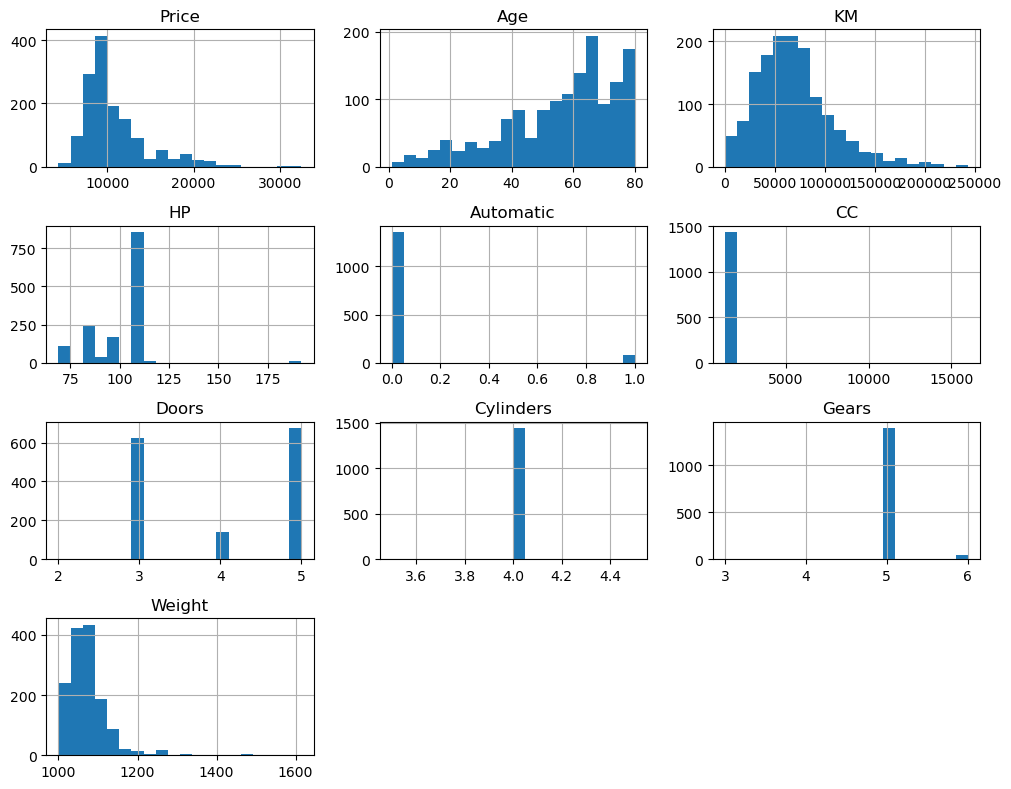

In [11]:
# Plot histograms for all numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

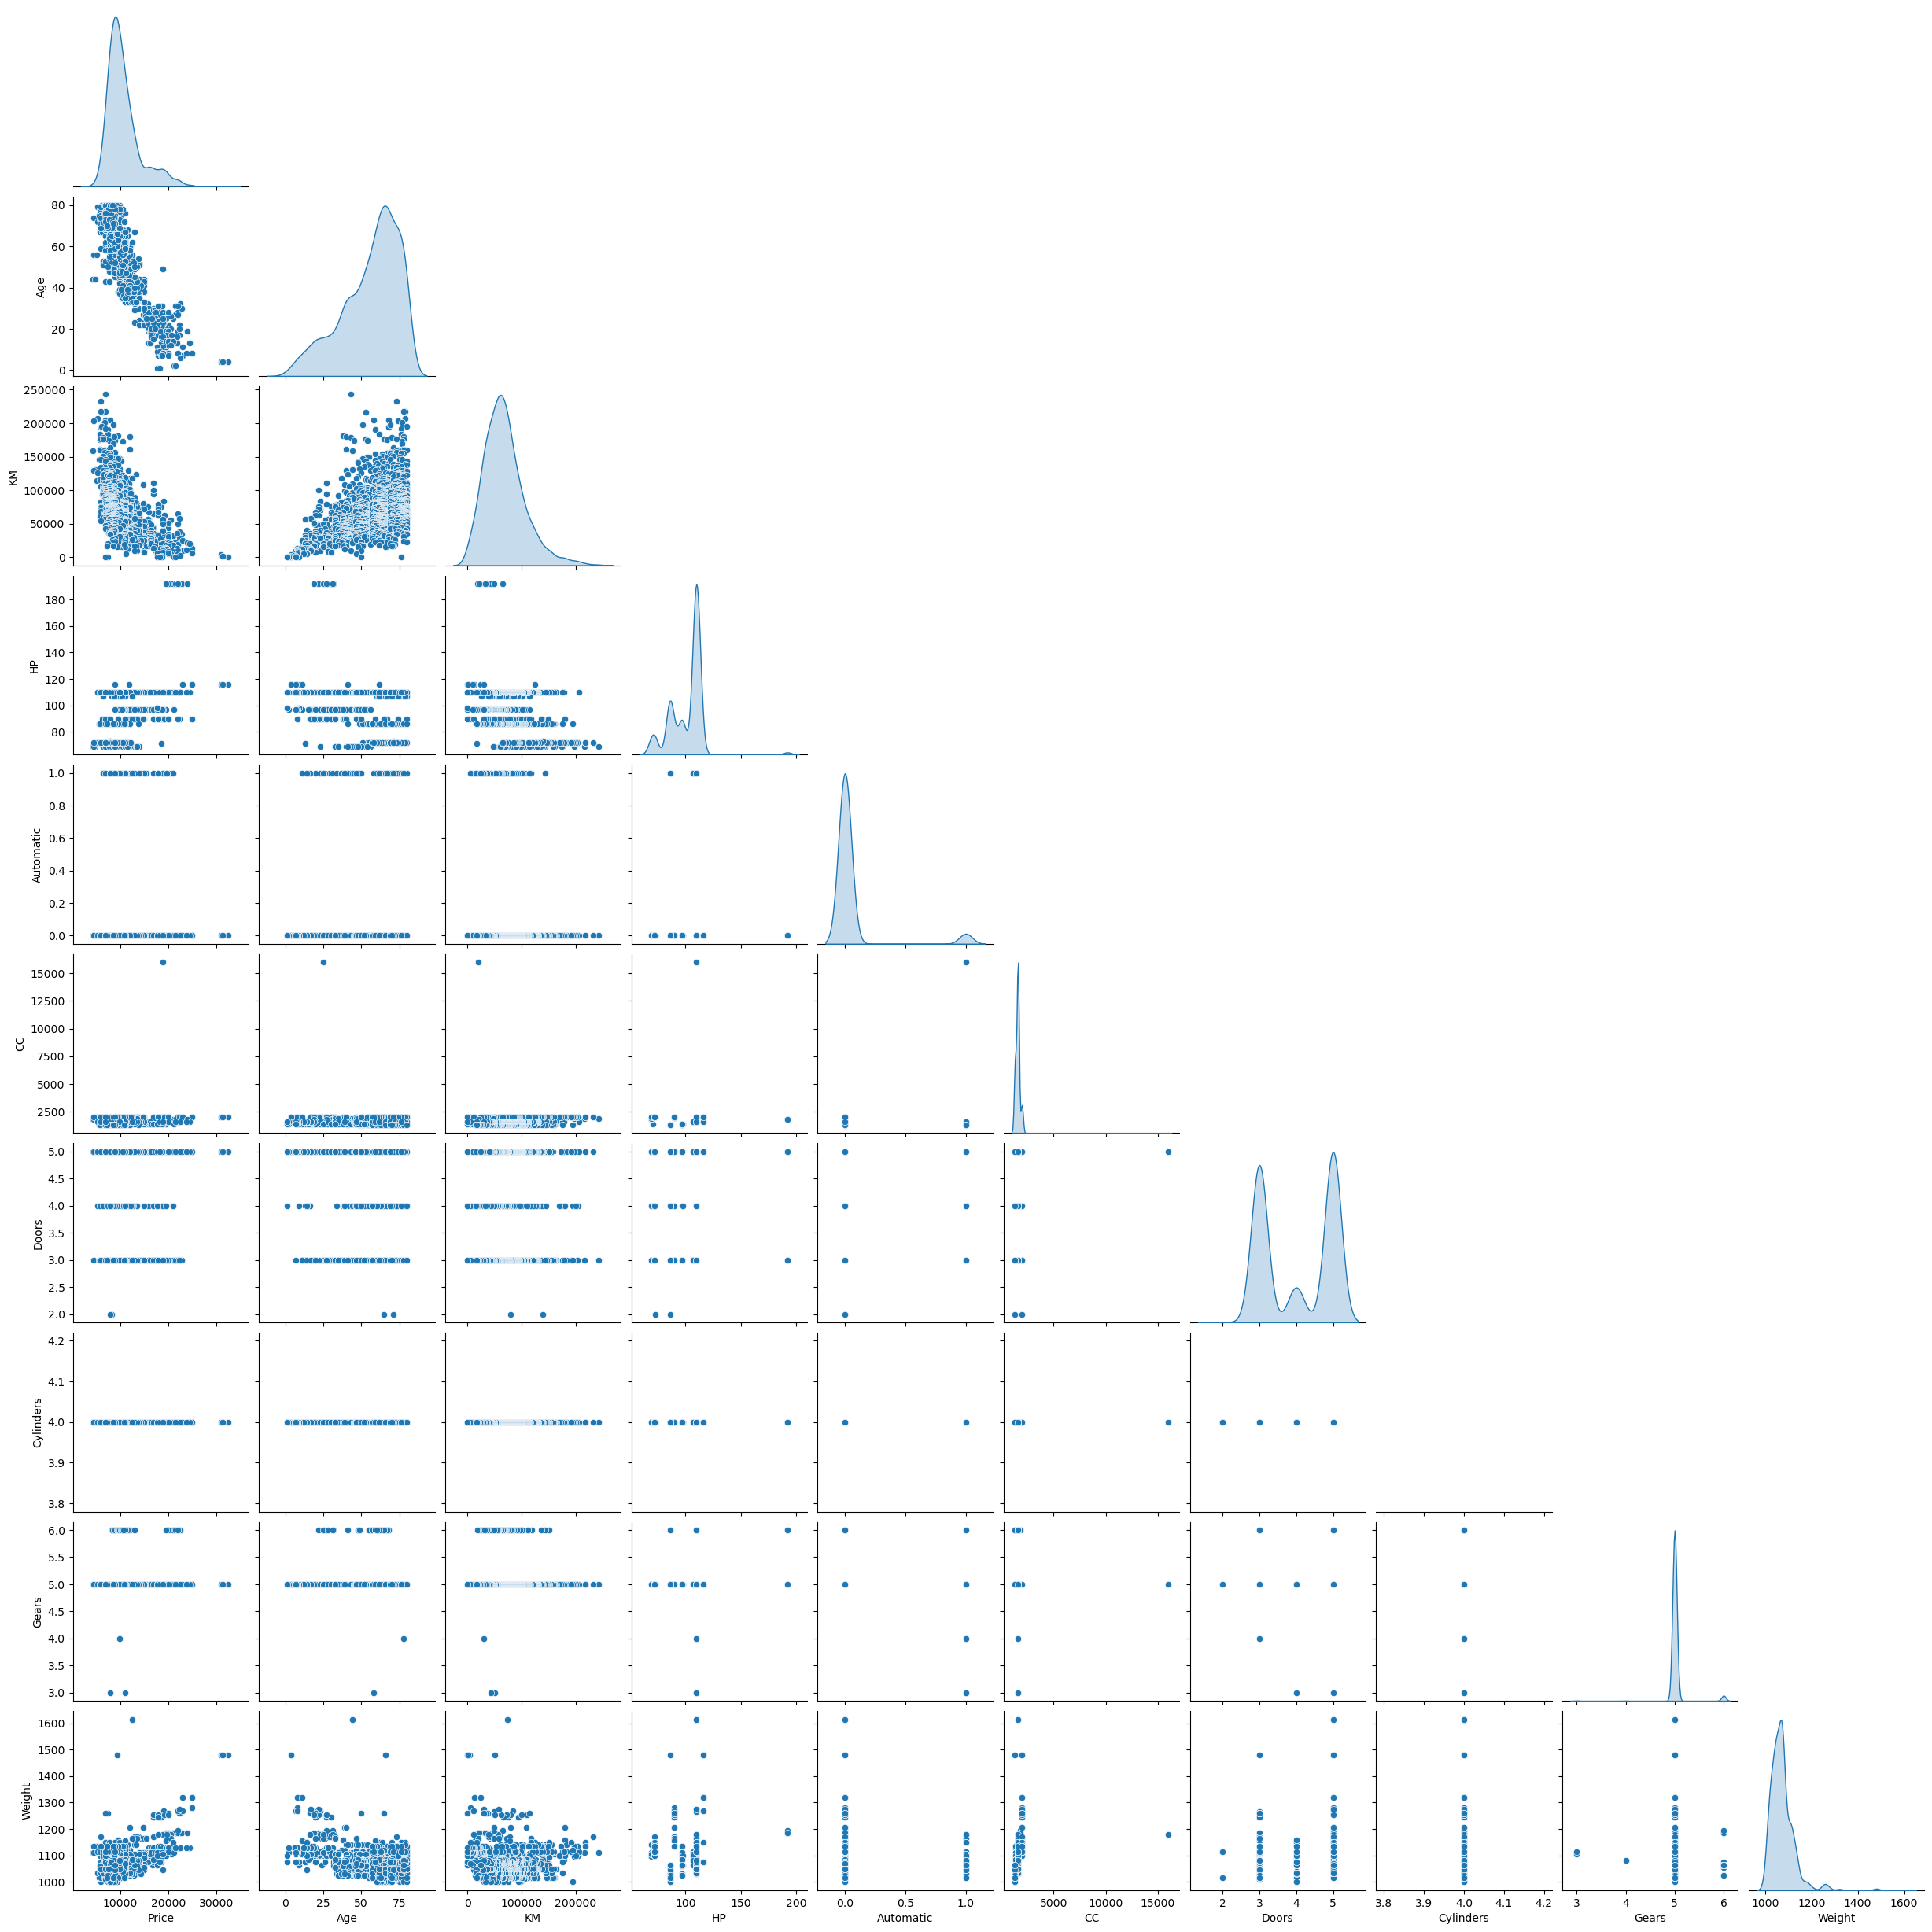

In [12]:
# Visualize pairwise relationships using pairplot
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

Automatic
0    1356
1      80
Name: count, dtype: int64


<Axes: xlabel='Automatic', ylabel='count'>

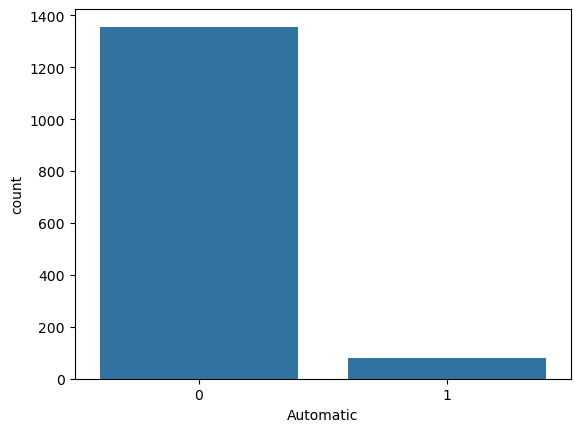

In [13]:
# Analyze the distribution of 'Automatic' column
print(df['Automatic'].value_counts())
sns.countplot(x='Automatic', data=df)

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


<Axes: xlabel='Fuel_Type', ylabel='count'>

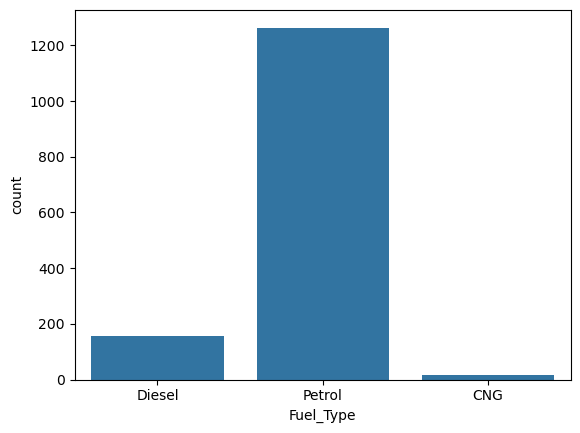

In [14]:
# Analyze the distribution of 'Fuel_Type' column
print(df['Fuel_Type'].value_counts())
sns.countplot(x='Fuel_Type', data=df)


In [15]:
# Encoding categorical variables using OrdinalEncoder
cat_cols = df.select_dtypes(object).columns  # Select categorical columns
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])

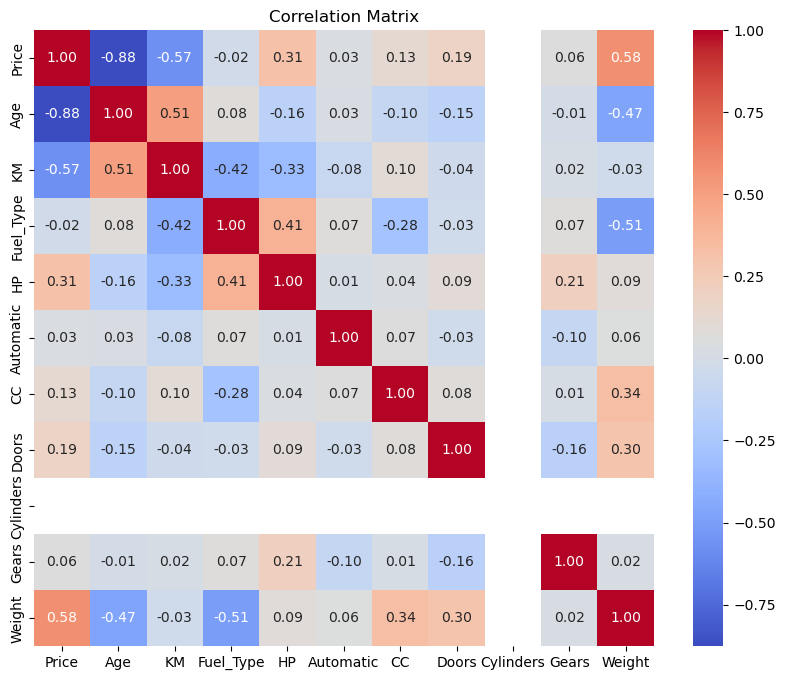

In [16]:
# Display correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Prepare data for model building
X = df.iloc[:, 1:]  # Features
y = df['Price']      # Target variable

In [18]:
# Split the dataset into training and testing sets (80%-20%)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

# ---- MODEL 1: Using all features ---- #

In [20]:
model_1 = LinearRegression()
model_1.fit(xtrain, ytrain)  # Train the model

LinearRegression()

In [21]:
# Predictions
y_pred_1 = model_1.predict(xtest)

In [22]:
# Evaluation metrics
mse_1 = mean_squared_error(ytest, y_pred_1)
r2_1 = r2_score(ytest, y_pred_1)

In [23]:
# Display results for Model 1
print(f'Model 1\nMSE: {mse_1:.2f}, R-squared: {r2_1:.2f}')
print(f'Intercept: {model_1.intercept_:.2f}')
print(f'Coefficients:\n {model_1.coef_}\n')

Model 1
MSE: 2415605.38, R-squared: 0.83
Intercept: -8472.32
Coefficients:
 [-1.24527697e+02 -1.65602116e-02  3.66287633e+02  3.07164825e+01
  3.35845604e+02 -1.00767900e+00 -4.81042453e+01 -1.13686838e-13
  5.73385132e+02  2.08388147e+01]



# ---- MODEL 2: Using selected features ---- #

In [25]:
X_reduced = df[['Age', 'HP', 'Weight']]  # Select key features
xtrain_red, xtest_red, ytrain_red, ytest_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [26]:
model_2 = LinearRegression()
model_2.fit(xtrain_red, ytrain_red)  # Train the model

LinearRegression()

In [27]:
# Predictions
y_pred_2 = model_2.predict(xtest_red)

In [28]:
# Evaluation metrics
mse_2 = mean_squared_error(ytest_red, y_pred_2)
r2_2 = r2_score(ytest_red, y_pred_2)

In [29]:
# Display results for Model 2
print(f'Model 2\nMSE: {mse_2:.2f}, R-squared: {r2_2:.2f}')
print(f'Intercept: {model_2.intercept_:.2f}')
print(f'Coefficients:\n {model_2.coef_}\n')

Model 2
MSE: 2247516.00, R-squared: 0.83
Intercept: -2051.96
Coefficients:
 [-144.45356741   42.73267677   15.4181018 ]



# ---- MODEL 3: Adding interaction terms ---- #

In [31]:
xtrain_interaction = xtrain.copy()
xtrain_interaction['Age_HP'] = xtrain_interaction['Age'] * xtrain_interaction['HP']

In [32]:
xtest_interaction = xtest.copy()
xtest_interaction['Age_HP'] = xtest_interaction['Age'] * xtest_interaction['HP']

In [33]:
model_3 = LinearRegression()
model_3.fit(xtrain_interaction, ytrain)  # Train the model

LinearRegression()

In [34]:
# Predictions
y_pred_3 = model_3.predict(xtest_interaction)

In [35]:
# Evaluation metrics
mse_3 = mean_squared_error(ytest, y_pred_3)
r2_3 = r2_score(ytest, y_pred_3)

In [36]:
# Display results for Model 3
print(f'Model 3\nMSE: {mse_3:.2f}, R-squared: {r2_3:.2f}')
print(f'Intercept: {model_3.intercept_:.2f}')
print(f'Coefficients:\n {model_3.coef_}\n')

Model 3
MSE: 1643507.59, R-squared: 0.88
Intercept: -14403.76
Coefficients:
 [ 9.30021258e+00 -1.79745667e-02  6.08831605e+02  9.20437631e+01
  2.77000509e+02 -3.41706480e-01 -1.57745744e+01  0.00000000e+00
  4.07293745e+02  1.96999947e+01 -1.28596980e+00]



# ---- LASSO REGRESSION ---- #

In [38]:
lasso = Lasso(alpha=1.0)
lasso.fit(xtrain, ytrain)
print(f'Lasso Score: Training {lasso.score(xtrain, ytrain):.2f}, Testing {lasso.score(xtest, ytest):.2f}')
print(f'Lasso Coefficients:\n{lasso.coef_}')

Lasso Score: Training 0.86, Testing 0.83
Lasso Coefficients:
[-1.24442768e+02 -1.65968810e-02  3.46380694e+02  3.09893494e+01
  3.13548074e+02 -1.03067387e+00 -4.79481815e+01  0.00000000e+00
  5.44430022e+02  2.08312698e+01]


# ---- RIDGE REGRESSION ---- #

In [40]:
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)
print(f'Ridge Score: Training {ridge.score(xtrain, ytrain):.2f}, Testing {ridge.score(xtest, ytest):.2f}')
print(f'Ridge Coefficients:\n{ridge.coef_}')

Ridge Score: Training 0.86, Testing 0.83
Ridge Coefficients:
[-1.24503992e+02 -1.65671969e-02  3.60425359e+02  3.08181705e+01
  3.28656499e+02 -1.01494733e+00 -4.86509313e+01  0.00000000e+00
  5.59059758e+02  2.08406499e+01]


# Interpretation of Results

Both Lasso and Ridge regression models were applied to predict the target variable using the given features. Here’s a detailed interpretation of the results:

# 1.Performance of the Models

* Training Score: Both models achieve a training 𝑅2 score of 0.86, meaning the models explain 86% of the variance in the training data.
* Testing Score: Both models yield a testing 𝑅2score of 0.83, demonstrating good generalization. The similarity between the training and testing scores suggests the models are not overfitting and perform consistently on unseen data.

# 2.Lasso Regression

1) Key Feature: Lasso applies L1 regularization, which penalizes the sum of absolute coefficients. This leads to:

- Some coefficients being reduced to exactly zero (e.g., the 8th coefficient), effectively removing the corresponding feature from the model.
- Simplification of the model by retaining only the most significant predictors.

2) Feature Interpretation:

- The 3rd feature has the largest positive impact on the target, with a coefficient of approximately 346.38, meaning that for every unit increase in this feature, the target variable increases by 346.38 units, holding all else constant.
- The 1st feature has a negative coefficient (-124.44), indicating an inverse relationship with the target variable; as this feature increases, the target decreases.

3) Implications:

- Lasso identifies features that are most impactful while excluding the less important ones, making the model more interpretable and sparse.

# 3.Ridge Regression

1) Key Feature: Ridge uses L2 regularization, which penalizes the sum of squared coefficients. This results in:

- Coefficients being shrunk closer to zero but never reduced to exactly zero.
- Retention of all features in the model, regardless of their individual contribution.

2) Feature Interpretation:

- The coefficients are similar in magnitude to those of Lasso, with slight differences. For example, the 3rd feature still has the highest positive impact (360.43) while the 1st feature has a similar negative impact (-124.50).
- All features are retained, even those with minimal contribution (e.g., the 8th feature).

3) Implications:

- Ridge is useful when retaining all features is important, especially in cases of multicollinearity. However, the inclusion of weak predictors may make the model less interpretable.
